In [123]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
_host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com"
_port = 3306
_user = "eda_sh"
_password = "sh"

In [5]:
conn = mysql.connector.connect(
    host = _host,
    port = _port,
    user = _user,
    password = _password,
    database = "eda_project"
)

In [62]:
sql = '''SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'high'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [63]:
high_win_kda_avg_df = pd.read_sql(sql, con=conn)
high_win_kda_avg_df = high_win_kda_avg_df.set_index('individualPosition')
high_win_kda_avg_df.head()

/tmp/ipykernel_3366/2374747308.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_win_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,4.010942
SUPPORT,5.414619
MIDDLE,5.143253
JUNGLE,6.319996
BOTTOM,5.373481


In [64]:
sql = '''SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'high'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [65]:
high_lose_kda_avg_df = pd.read_sql(sql, con=conn)
high_lose_kda_avg_df = high_lose_kda_avg_df.set_index('individualPosition')
high_lose_kda_avg_df.head()

/tmp/ipykernel_3366/1722681851.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_lose_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,1.308289
SUPPORT,1.802574
MIDDLE,1.663864
JUNGLE,1.875076
BOTTOM,1.720370


## Master Tier TOP 200 KDA Average

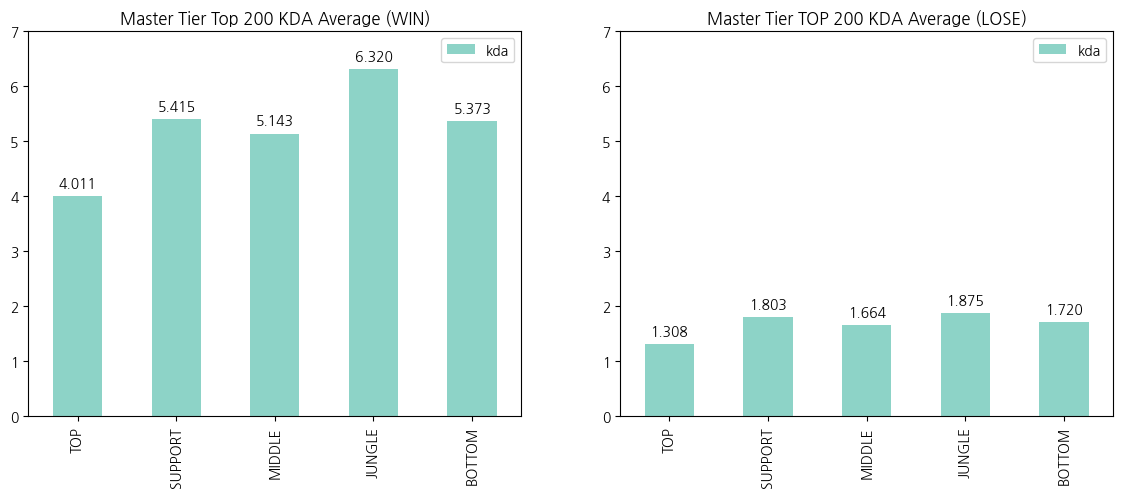

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

high_win_kda_avg_df.plot(kind='bar', ax=ax[0], legend=True, colormap='Set3')
ax[0].set_title("Master Tier Top 200 KDA Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 7])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

high_lose_kda_avg_df.plot(kind='bar', ax=ax[1], legend=True, colormap='Set3')
ax[1].set_title("Master Tier TOP 200 KDA Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 7])
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

In [68]:
sql = '''SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'high'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [69]:
high_lose_kda_df = pd.read_sql(sql, con=conn)
high_lose_kda_df = high_lose_kda_df.set_index('individualPosition')
high_lose_kda_df.head()

/tmp/ipykernel_3366/4194121251.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_lose_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,3.6387,3.5319,6.1845
SUPPORT,1.8154,8.8366,6.6355
MIDDLE,4.3187,4.5196,6.0058
JUNGLE,4.8551,5.9948,6.3410
BOTTOM,5.0049,4.8768,6.2989


In [70]:
sql = '''SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'high'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [71]:
high_win_kda_df = pd.read_sql(sql, con=conn)
high_win_kda_df = high_win_kda_df.set_index('individualPosition')
high_win_kda_df.head()

/tmp/ipykernel_3366/110566158.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_win_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,5.7910,6.0096,3.9431
SUPPORT,2.4509,14.8691,4.3454
MIDDLE,6.9474,7.5035,3.7782
JUNGLE,7.7605,9.7007,3.6992
BOTTOM,8.3819,7.8555,3.9924


## Master Tier TOP 200 kills, assists, deaths average

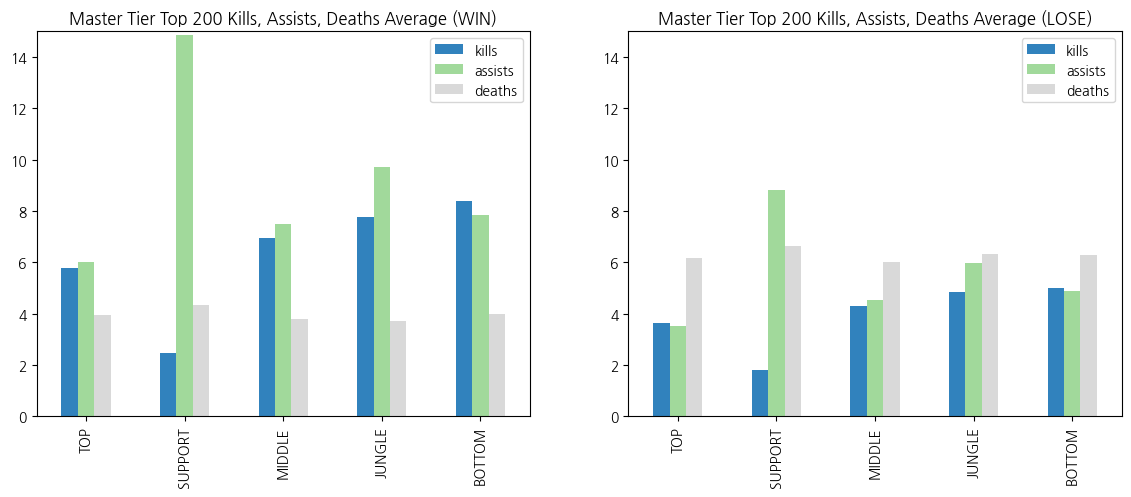

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

high_win_kda_df.plot(kind='bar', ax=ax[0], legend=True, colormap='tab20c')
ax[0].set_title("Master Tier Top 200 Kills, Assists, Deaths Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 15])

high_lose_kda_df.plot(kind='bar', ax=ax[1], legend=True, colormap='tab20c')
ax[1].set_title("Master Tier Top 200 Kills, Assists, Deaths Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 15])

plt.show()

In [73]:
sql = """SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'low'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC"""

In [74]:
low_win_kda_avg_df = pd.read_sql(sql, con=conn)
low_win_kda_avg_df = low_win_kda_avg_df.set_index('individualPosition')
low_win_kda_avg_df.head()

/tmp/ipykernel_3366/133394369.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_win_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,3.977013
SUPPORT,5.466005
MIDDLE,5.061403
JUNGLE,6.265120
BOTTOM,5.364304


In [75]:
sql = """SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'low'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC"""

In [76]:
low_lose_kda_avg_df = pd.read_sql(sql, con=conn)
low_lose_kda_avg_df = low_lose_kda_avg_df.set_index('individualPosition')
low_lose_kda_avg_df.head()

/tmp/ipykernel_3366/292772993.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_lose_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,1.287869
SUPPORT,1.787367
MIDDLE,1.651540
JUNGLE,1.844203
BOTTOM,1.717137


## Master Tier Bottom 200 KDA average

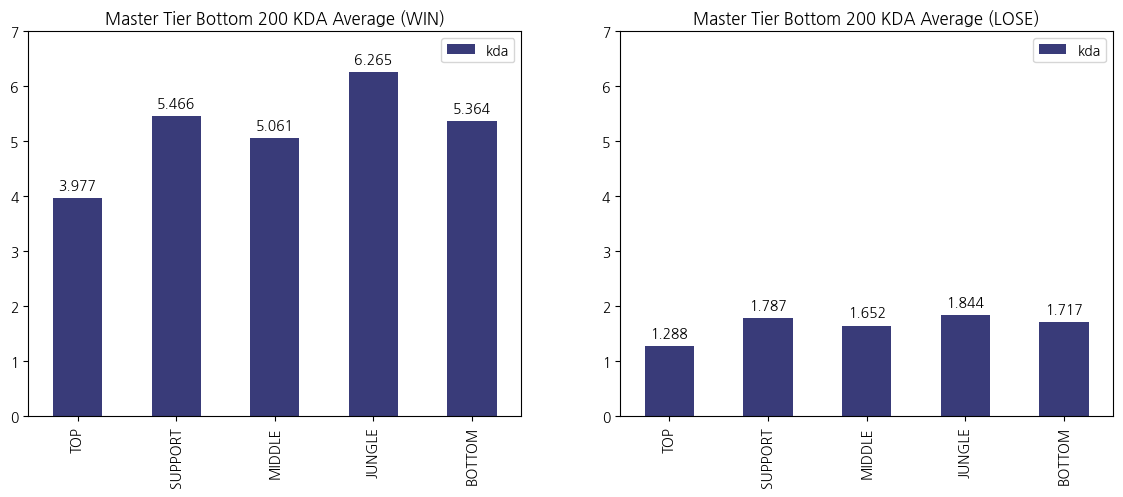

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

low_win_kda_avg_df.plot(kind='bar', ax=ax[0], legend=True, colormap='tab20b')
ax[0].set_title("Master Tier Bottom 200 KDA Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 7])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

low_lose_kda_avg_df.plot(kind='bar', ax=ax[1], legend=True, colormap='tab20b')
ax[1].set_title("Master Tier Bottom 200 KDA Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 7])
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

In [78]:
sql = '''SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'low'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [79]:
low_lose_kda_df = pd.read_sql(sql, con=conn)
low_lose_kda_df = low_lose_kda_df.set_index('individualPosition')
low_lose_kda_df.head()

/tmp/ipykernel_3366/1757366352.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_lose_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,3.6413,3.5288,6.2437
SUPPORT,1.8291,8.7755,6.6799
MIDDLE,4.3575,4.4827,6.0306
JUNGLE,4.8059,5.9392,6.3925
BOTTOM,5.0112,4.8688,6.2959


In [80]:
sql = '''SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid' AND ranking = 'low'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [81]:
low_win_kda_df = pd.read_sql(sql, con=conn)
low_win_kda_df = low_win_kda_df.set_index('individualPosition')
low_win_kda_df.head()

/tmp/ipykernel_3366/542326712.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_win_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,5.8392,5.9423,3.9653
SUPPORT,2.5091,14.8866,4.3349
MIDDLE,7.0130,7.4690,3.7704
JUNGLE,7.7541,9.6974,3.7212
BOTTOM,8.4041,7.8882,3.9768


## Master Tier Bottom 200 kills, assists, deaths average

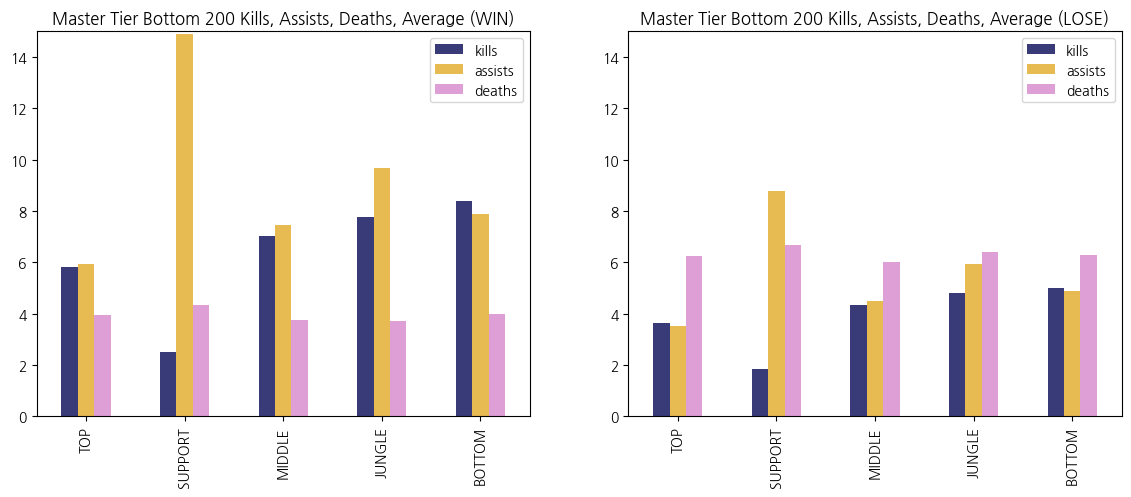

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

low_win_kda_df.plot(kind='bar', ax=ax[0], legend=True, colormap='tab20b')
ax[0].set_title("Master Tier Bottom 200 Kills, Assists, Deaths, Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 15])

low_lose_kda_df.plot(kind='bar', ax=ax[1], legend=True, colormap='tab20b')
ax[1].set_title("Master Tier Bottom 200 Kills, Assists, Deaths, Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 15])

plt.show()

In [83]:
sql = """SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC"""

In [84]:
all_win_kda_df = pd.read_sql(sql, con=conn)
all_win_kda_df = all_win_kda_df.set_index('individualPosition')
all_win_kda_df.head()

/tmp/ipykernel_3366/3820212329.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_win_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,5.8160,5.9747,3.9546
SUPPORT,2.4811,14.8782,4.3400
MIDDLE,6.9814,7.4856,3.7742
JUNGLE,7.7572,9.6990,3.7106
BOTTOM,8.3934,7.8724,3.9843


In [85]:
sql = """SELECT individualPosition, AVG(kills) kills, AVG(assists) assists, AVG(deaths) deaths
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC"""

In [86]:
all_lose_kda_df = pd.read_sql(sql, con=conn)
all_lose_kda_df = all_lose_kda_df.set_index('individualPosition')
all_lose_kda_df.head()

/tmp/ipykernel_3366/3097390433.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_lose_kda_df = pd.read_sql(sql, con=conn)


,kills,assists,deaths
individualPosition,,,
TOP,3.6401,3.5303,6.2152
SUPPORT,1.8225,8.8049,6.6585
MIDDLE,4.3388,4.5005,6.0187
JUNGLE,4.8296,5.9659,6.3677
BOTTOM,5.0081,4.8727,6.2974


## Master Tier Total kills, assists, deaths average

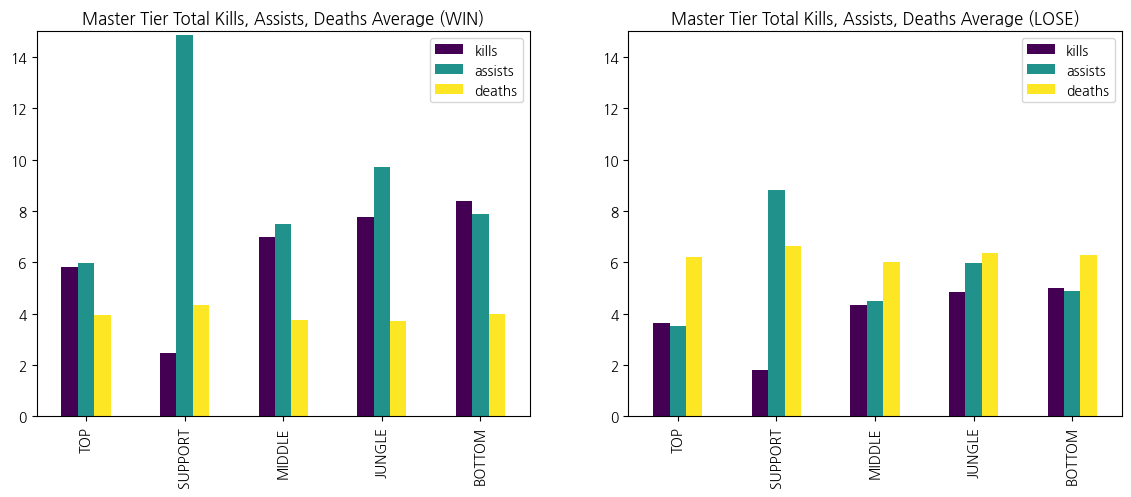

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

all_win_kda_df.plot(kind='bar', ax=ax[0], legend=True, colormap='viridis')
ax[0].set_title("Master Tier Total Kills, Assists, Deaths Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 15])

all_lose_kda_df.plot(kind='bar', ax=ax[1], legend=True, colormap='viridis')
ax[1].set_title("Master Tier Total Kills, Assists, Deaths Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 15])

plt.show()

In [88]:
sql = '''SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 0 AND individualPosition NOT LIKE 'Invalid'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [89]:
all_lose_kda_avg_df = pd.read_sql(sql, con=conn)
all_lose_kda_avg_df = all_lose_kda_avg_df.set_index('individualPosition')
all_lose_kda_avg_df.head()

/tmp/ipykernel_3366/1582312339.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_lose_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,1.297703
SUPPORT,1.794691
MIDDLE,1.657479
JUNGLE,1.859065
BOTTOM,1.718696


In [90]:
sql = '''SELECT individualPosition, AVG((kills + assists) / deaths) kda
         FROM match_data
         WHERE win = 1 AND individualPosition NOT LIKE 'Invalid'
         GROUP BY individualPosition
         ORDER BY individualPosition DESC'''

In [91]:
all_win_kda_avg_df = pd.read_sql(sql, con=conn)
all_win_kda_avg_df = all_win_kda_avg_df.set_index('individualPosition')
all_win_kda_avg_df.head()

/tmp/ipykernel_3366/2661815800.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_win_kda_avg_df = pd.read_sql(sql, con=conn)


,kda
individualPosition,
TOP,3.993356
SUPPORT,5.441268
MIDDLE,5.100833
JUNGLE,6.291533
BOTTOM,5.368734


## Master Tier Total KDA average

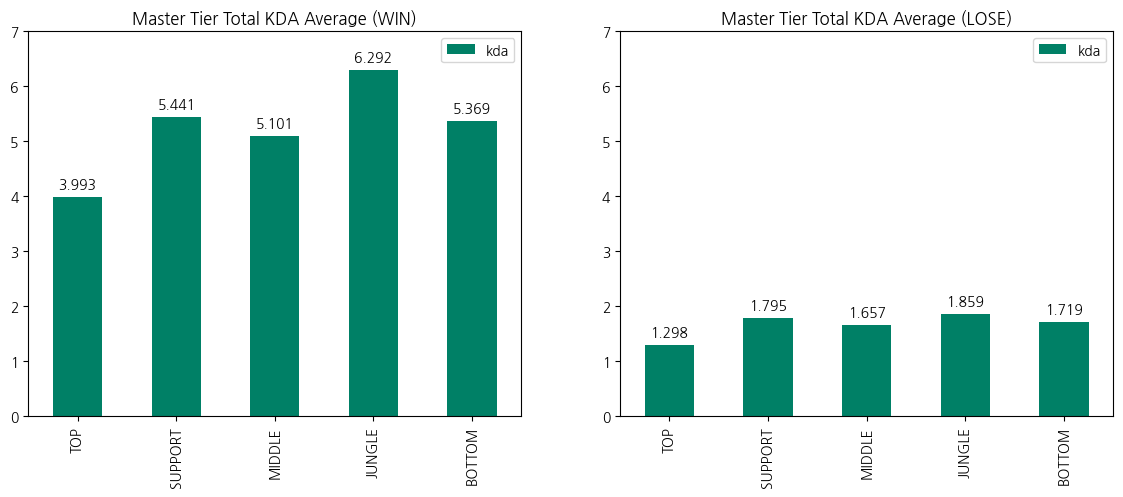

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

all_win_kda_avg_df.plot(kind='bar', ax=ax[0], legend=True, colormap='summer')
ax[0].set_title("Master Tier Total KDA Average (WIN)")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_ylim([0, 7])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

all_lose_kda_avg_df.plot(kind='bar', ax=ax[1], legend=True, colormap='summer')
ax[1].set_title("Master Tier Total KDA Average (LOSE)")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylim([0, 7])
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.3f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

라인별 가장 많이 한 챔피언 TOP 10 KDA

In [48]:
sql = '''SELECT championName, individualPosition, COUNT(championName) count, AVG(CASE WHEN deaths = 0 THEN (kills + assists) ELSE (kills + assists) / deaths END) AS kda
         FROM match_data
         WHERE individualPosition = 'TOP'
         GROUP BY championName
         ORDER BY count DESC
         LIMIT 10'''

In [49]:
high_kda_champion_top_df = pd.read_sql(sql, con=conn)
high_kda_champion_top_df = high_kda_champion_top_df.set_index('championName')
high_kda_champion_top_df

/tmp/ipykernel_6939/2316133587.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_kda_champion_top_df = pd.read_sql(sql, con=conn)


,individualPosition,count,kda
championName,,,
Aatrox,TOP,4876,2.802171
Jax,TOP,3851,2.567070
Jayce,TOP,2957,2.220258
KSante,TOP,2949,3.162340
Yone,TOP,2877,2.118164
Renekton,TOP,2435,2.863280
Fiora,TOP,2076,2.292737
Darius,TOP,1751,2.726513
Rumble,TOP,1726,3.261132


/tmp/ipykernel_6939/1511063373.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_top_df['kda'][i], ha='center')


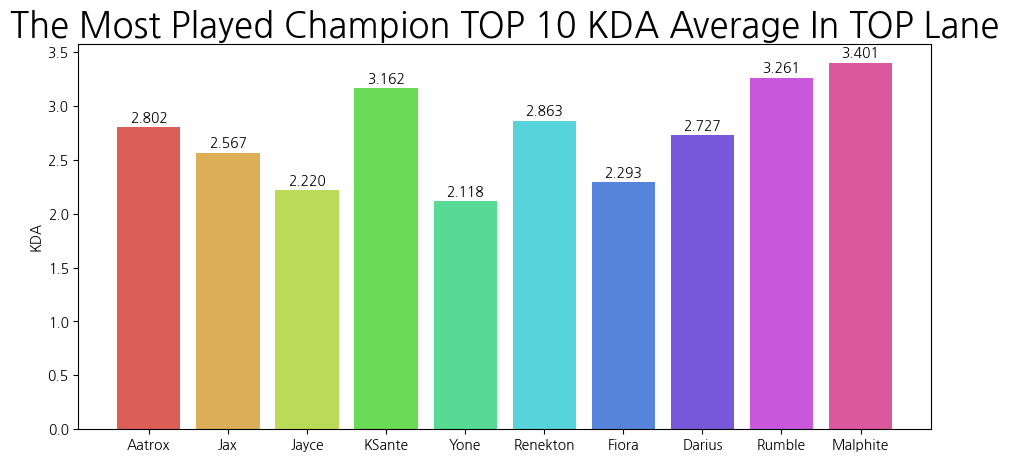

In [50]:
plt.figure(figsize=(11, 5))
colors = sns.color_palette('hls', len(high_kda_champion_top_df['kda']))
bar = plt.bar(high_kda_champion_top_df.index, high_kda_champion_top_df['kda'], color=colors)
for i, v in enumerate(bar):
    plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_top_df['kda'][i], ha='center')
plt.title("The Most Played Champion TOP 10 KDA Average In TOP Lane", fontdict={'fontsize': 25})
plt.ylabel("KDA")
plt.show()

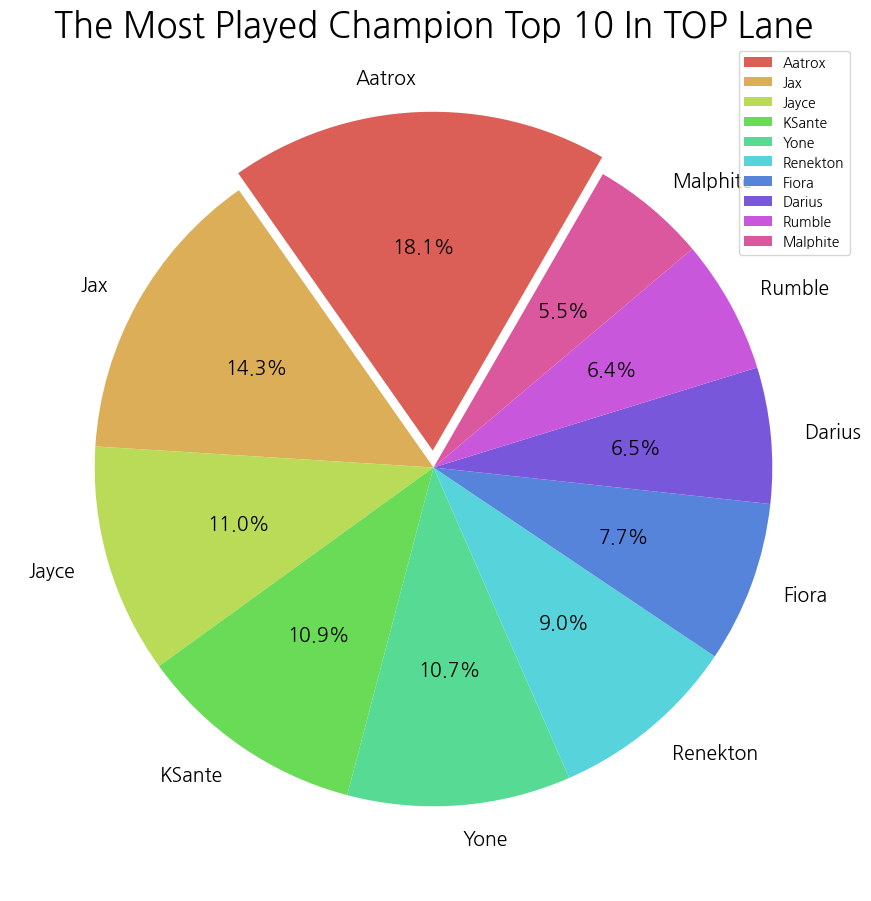

In [51]:
plt.figure(figsize=(11, 11))
colors = sns.color_palette('hls', len(high_kda_champion_top_df['kda']))
plt.pie(data=high_kda_champion_top_df, x='count', labels=high_kda_champion_top_df.index,
        autopct='%1.1f%%', startangle=60, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors, textprops={'fontsize' : 14})
plt.legend(high_kda_champion_top_df.index)
plt.title("The Most Played Champion Top 10 In TOP Lane", fontdict={'fontsize': 25})
plt.show()

In [52]:
sql = '''SELECT championName, individualPosition, COUNT(championName) count, AVG(CASE WHEN deaths = 0 THEN (kills + assists) ELSE (kills + assists) / deaths END) AS kda
         FROM match_data
         WHERE individualPosition = 'MIDDLE'
         GROUP BY championName
         ORDER BY count DESC
         LIMIT 10'''

In [53]:
high_kda_champion_middle_df = pd.read_sql(sql, con=conn)
high_kda_champion_middle_df = high_kda_champion_middle_df.set_index('championName')
high_kda_champion_middle_df

/tmp/ipykernel_6939/4147269571.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_kda_champion_middle_df = pd.read_sql(sql, con=conn)


,individualPosition,count,kda
championName,,,
Orianna,MIDDLE,4380,4.066616
Sylas,MIDDLE,3807,3.304974
Yone,MIDDLE,3452,2.692791
Akali,MIDDLE,3342,3.639863
Yasuo,MIDDLE,2565,2.738929
Syndra,MIDDLE,2411,3.413385
Ahri,MIDDLE,2073,4.077815
Leblanc,MIDDLE,2011,4.626436
Zed,MIDDLE,1949,3.381754


/tmp/ipykernel_6939/2385554237.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_middle_df['kda'][i], ha='center')


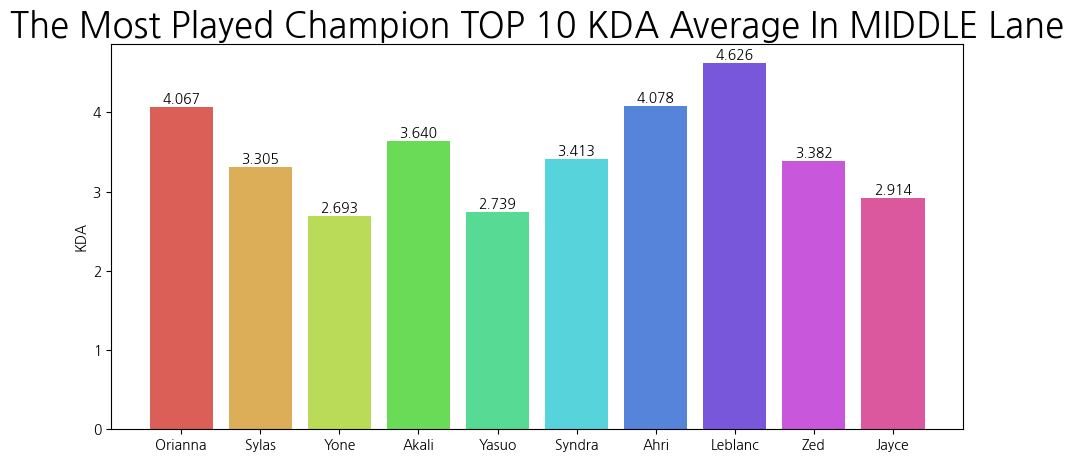

In [54]:
plt.figure(figsize=(11, 5))
colors = sns.color_palette('hls', len(high_kda_champion_middle_df['kda']))
bar = plt.bar(high_kda_champion_middle_df.index, high_kda_champion_middle_df['kda'], color=colors)
for i, v in enumerate(bar):
    plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_middle_df['kda'][i], ha='center')
    plt.title("The Most Played Champion TOP 10 KDA Average In MIDDLE Lane", fontdict={'fontsize': 25})
plt.ylabel("KDA")
plt.show()

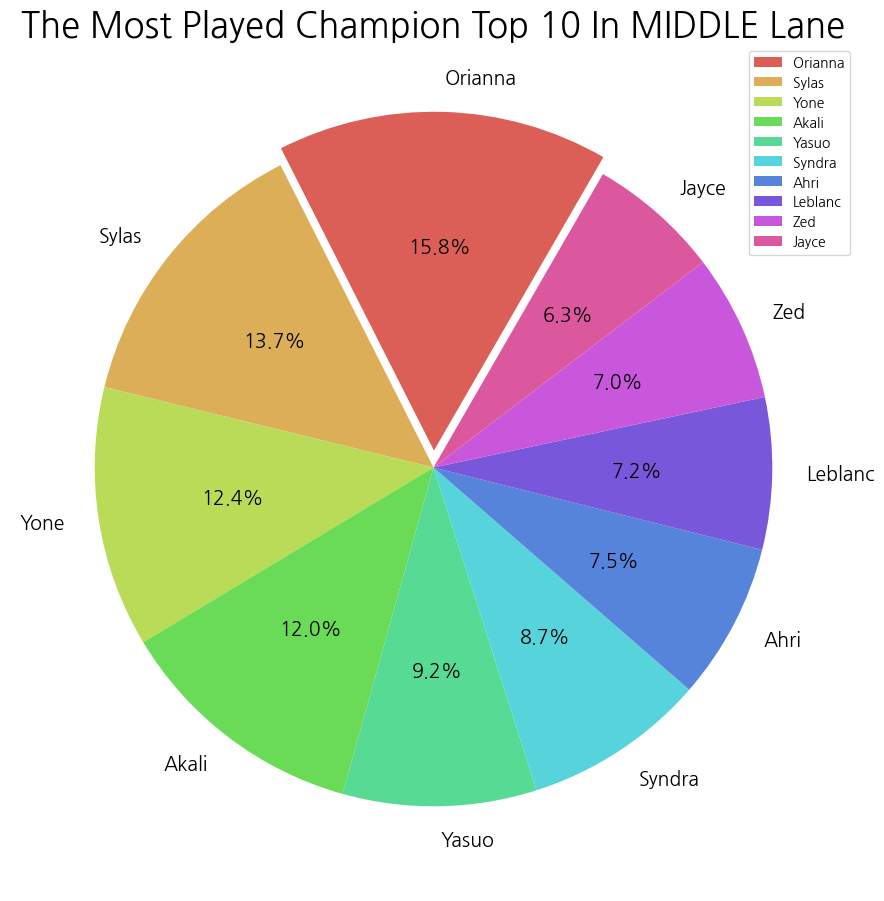

In [55]:
plt.figure(figsize=(11, 11))
colors = sns.color_palette('hls', len(high_kda_champion_middle_df['kda']))
plt.pie(data=high_kda_champion_middle_df, x='count', labels=high_kda_champion_middle_df.index,
        autopct='%1.1f%%', startangle=60, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors, textprops={'fontsize' : 14})
plt.legend(high_kda_champion_middle_df.index)
plt.title("The Most Played Champion Top 10 In MIDDLE Lane", fontdict={'fontsize': 25})
plt.show()

In [56]:
sql = '''SELECT championName, individualPosition, COUNT(championName) count, AVG(CASE WHEN deaths = 0 THEN (kills + assists) ELSE (kills + assists) / deaths END) AS kda
         FROM match_data
         WHERE individualPosition = 'BOTTOM'
         GROUP BY championName
         ORDER BY count DESC
         LIMIT 10'''

In [57]:
high_kda_champion_bottom_df = pd.read_sql(sql, con=conn)
high_kda_champion_bottom_df = high_kda_champion_bottom_df.set_index('championName')
high_kda_champion_bottom_df

/tmp/ipykernel_6939/1148747677.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_kda_champion_bottom_df = pd.read_sql(sql, con=conn)


,individualPosition,count,kda
championName,,,
Ezreal,BOTTOM,9058,3.953299
Kaisa,BOTTOM,8423,3.791140
Lucian,BOTTOM,5285,3.682438
Varus,BOTTOM,4003,3.382456
Jhin,BOTTOM,3864,4.588389
Xayah,BOTTOM,3746,3.523805
Caitlyn,BOTTOM,3197,3.306475
Aphelios,BOTTOM,3024,3.130112
Jinx,BOTTOM,2955,3.637283


/tmp/ipykernel_6939/1561499770.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_bottom_df['kda'][i], ha='center')


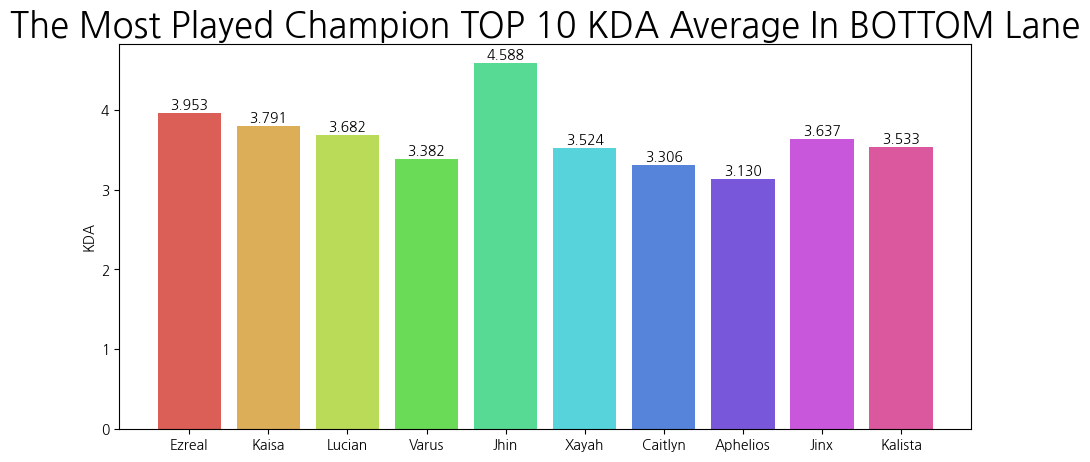

In [58]:
plt.figure(figsize=(11, 5))
colors = sns.color_palette('hls', len(high_kda_champion_bottom_df['kda']))
bar = plt.bar(high_kda_champion_bottom_df.index, high_kda_champion_bottom_df['kda'], color=colors)
for i, v in enumerate(bar):
    plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_bottom_df['kda'][i], ha='center')
    plt.title("The Most Played Champion TOP 10 KDA Average In BOTTOM Lane", fontdict={'fontsize': 25})
plt.ylabel("KDA")
plt.show()

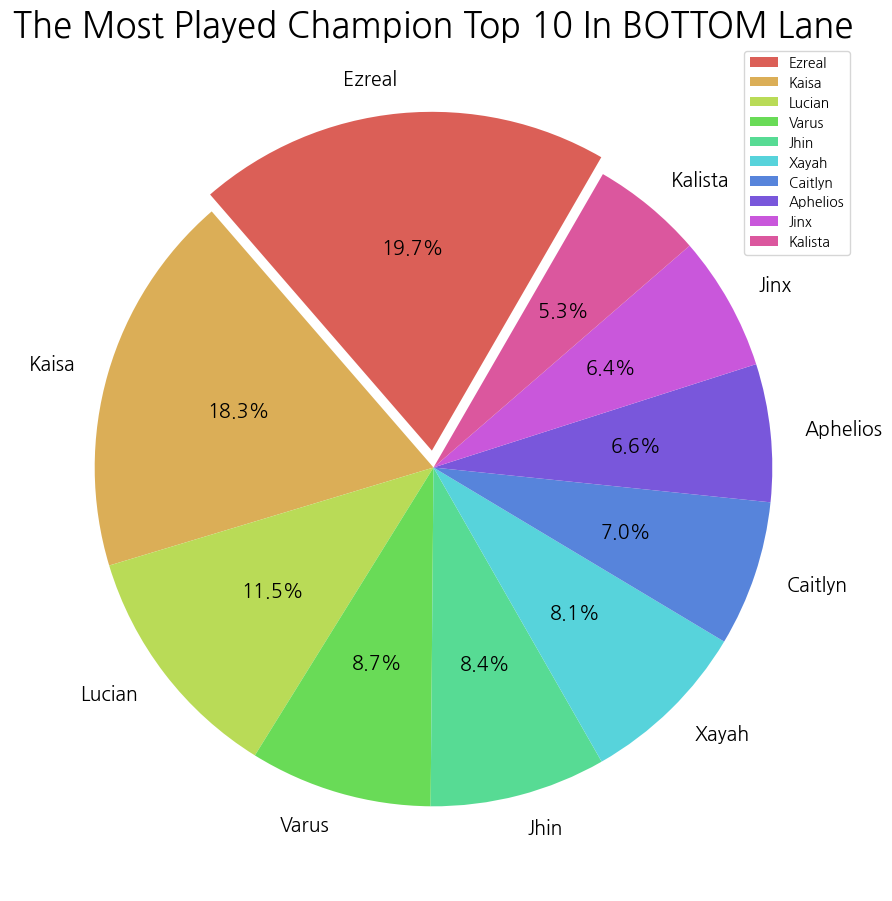

In [59]:
plt.figure(figsize=(11, 11))
colors = sns.color_palette('hls', len(high_kda_champion_middle_df['kda']))
plt.pie(data=high_kda_champion_bottom_df, x='count', labels=high_kda_champion_bottom_df.index,
        autopct='%1.1f%%', startangle=60, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors, textprops={'fontsize' : 14})
plt.legend(high_kda_champion_bottom_df.index)
plt.title("The Most Played Champion Top 10 In BOTTOM Lane", fontdict={'fontsize': 25})
plt.show()

In [60]:
sql = '''SELECT championName, individualPosition, COUNT(championName) count, AVG(CASE WHEN deaths = 0 THEN (kills + assists) ELSE (kills + assists) / deaths END) AS kda
         FROM match_data
         WHERE individualPosition = 'JUNGLE'
         GROUP BY championName
         ORDER BY count DESC
         LIMIT 10'''

In [61]:
high_kda_champion_jungle_df = pd.read_sql(sql, con=conn)
high_kda_champion_jungle_df = high_kda_champion_jungle_df.set_index('championName')
high_kda_champion_jungle_df

/tmp/ipykernel_6939/2533761327.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_kda_champion_jungle_df = pd.read_sql(sql, con=conn)


,individualPosition,count,kda
championName,,,
LeeSin,JUNGLE,9178,4.611804
Graves,JUNGLE,5935,4.310871
Nidalee,JUNGLE,3439,5.126810
JarvanIV,JUNGLE,2763,5.051395
Taliyah,JUNGLE,2492,4.102200
Viego,JUNGLE,2416,3.804725
Nocturne,JUNGLE,1754,4.077509
Belveth,JUNGLE,1620,4.181712
Karthus,JUNGLE,1618,3.239689


/tmp/ipykernel_6939/2501922522.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_jungle_df['kda'][i], ha='center')


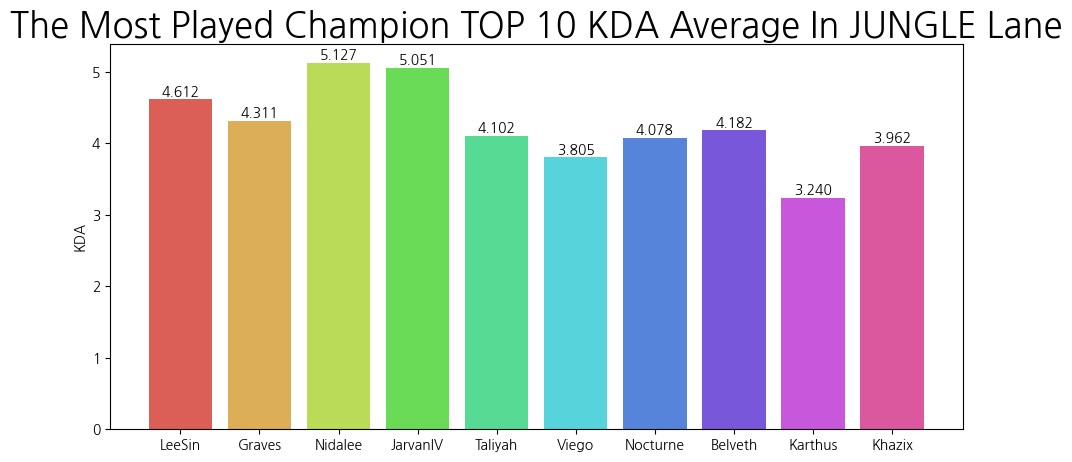

In [68]:
plt.figure(figsize=(11, 5))
colors = sns.color_palette('hls', len(high_kda_champion_jungle_df['kda']))
bar = plt.bar(high_kda_champion_jungle_df.index, high_kda_champion_jungle_df['kda'], color=colors)
for i, v in enumerate(bar):
    plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_jungle_df['kda'][i], ha='center')
plt.title("The Most Played Champion TOP 10 KDA Average In JUNGLE Lane", fontdict={'fontsize': 25})
plt.ylabel("KDA")
plt.show()

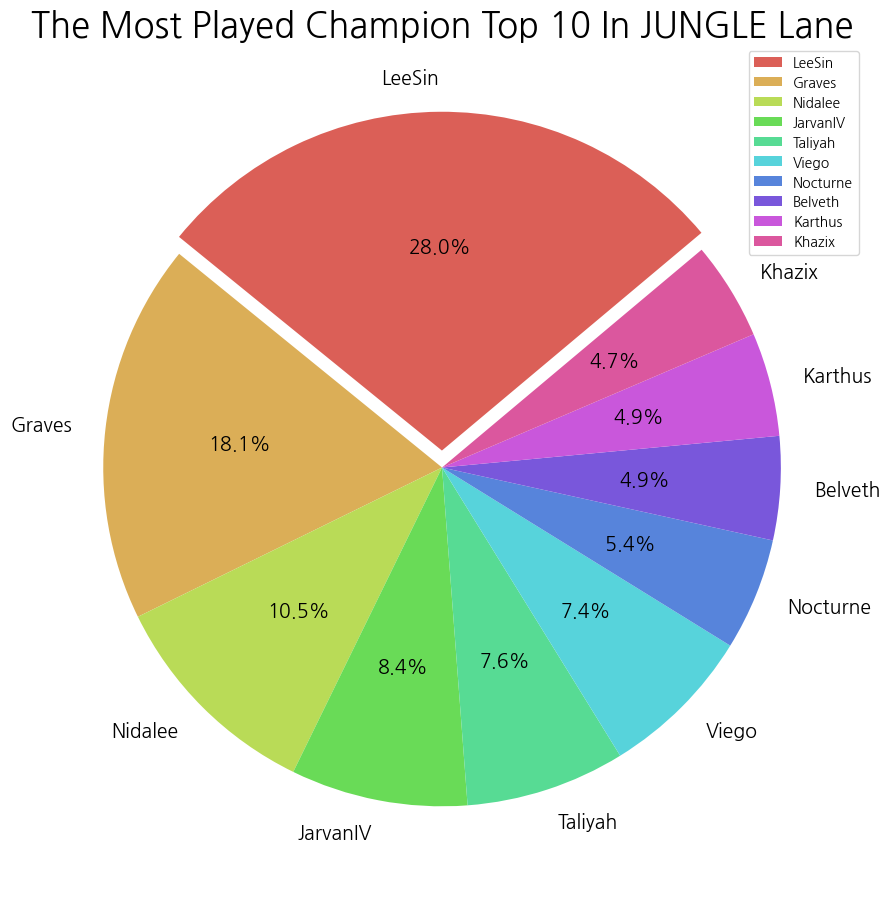

In [69]:
plt.figure(figsize=(11, 11))
colors = sns.color_palette('hls', len(high_kda_champion_jungle_df['kda']))
plt.pie(data=high_kda_champion_jungle_df, x='count', labels=high_kda_champion_jungle_df.index,
        autopct='%1.1f%%', startangle=40, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors, textprops={'fontsize' : 14})
plt.legend(high_kda_champion_jungle_df.index)
plt.title("The Most Played Champion Top 10 In JUNGLE Lane", fontdict={'fontsize': 25})
plt.show()

In [64]:
sql = '''SELECT championName, individualPosition, COUNT(championName) count, AVG(CASE WHEN deaths = 0 THEN (kills + assists) ELSE (kills + assists) / deaths END) AS kda
         FROM match_data
         WHERE individualPosition = 'SUPPORT'
         GROUP BY championName
         ORDER BY count DESC
         LIMIT 10'''

In [65]:
high_kda_champion_support_df = pd.read_sql(sql, con=conn)
high_kda_champion_support_df = high_kda_champion_support_df.set_index('championName')
high_kda_champion_support_df

/tmp/ipykernel_6939/3049869039.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_kda_champion_support_df = pd.read_sql(sql, con=conn)


,individualPosition,count,kda
championName,,,
Rakan,SUPPORT,5540,4.381352
Nautilus,SUPPORT,4629,3.257380
Thresh,SUPPORT,4491,3.775830
Blitzcrank,SUPPORT,3909,3.556581
Pyke,SUPPORT,2893,3.299294
Karma,SUPPORT,2765,3.516814
Alistar,SUPPORT,2711,3.670007
Senna,SUPPORT,2547,3.641597
Rell,SUPPORT,2331,4.084634


/tmp/ipykernel_6939/3229313794.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_support_df['kda'][i], ha='center')


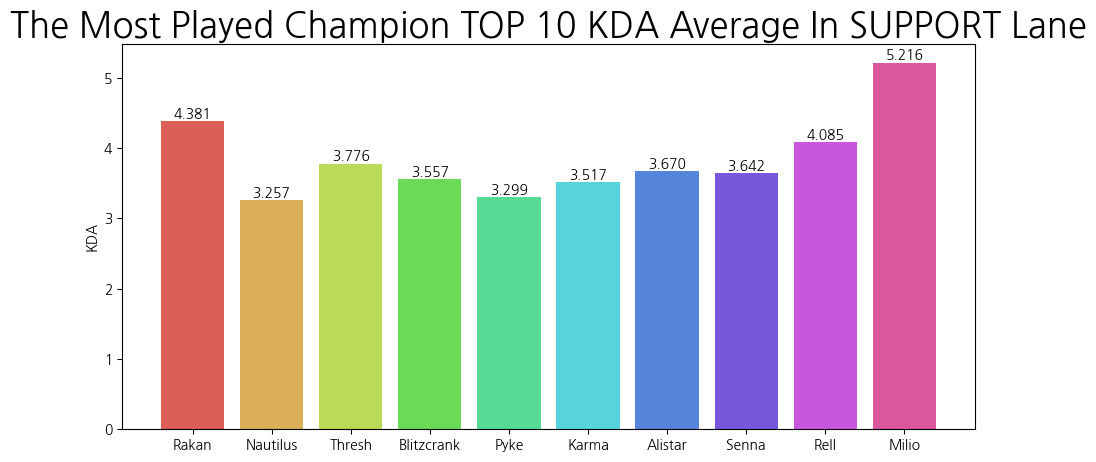

In [70]:
plt.figure(figsize=(11, 5))
colors = sns.color_palette('hls', len(high_kda_champion_support_df['kda']))
bar = plt.bar(high_kda_champion_support_df.index, high_kda_champion_support_df['kda'], color=colors)
for i, v in enumerate(bar):
    plt.text(i, v.get_height() + 0.05, '%.3f' % high_kda_champion_support_df['kda'][i], ha='center')
plt.title("The Most Played Champion TOP 10 KDA Average In SUPPORT Lane", fontdict={'fontsize': 25})
plt.ylabel("KDA")
plt.show()

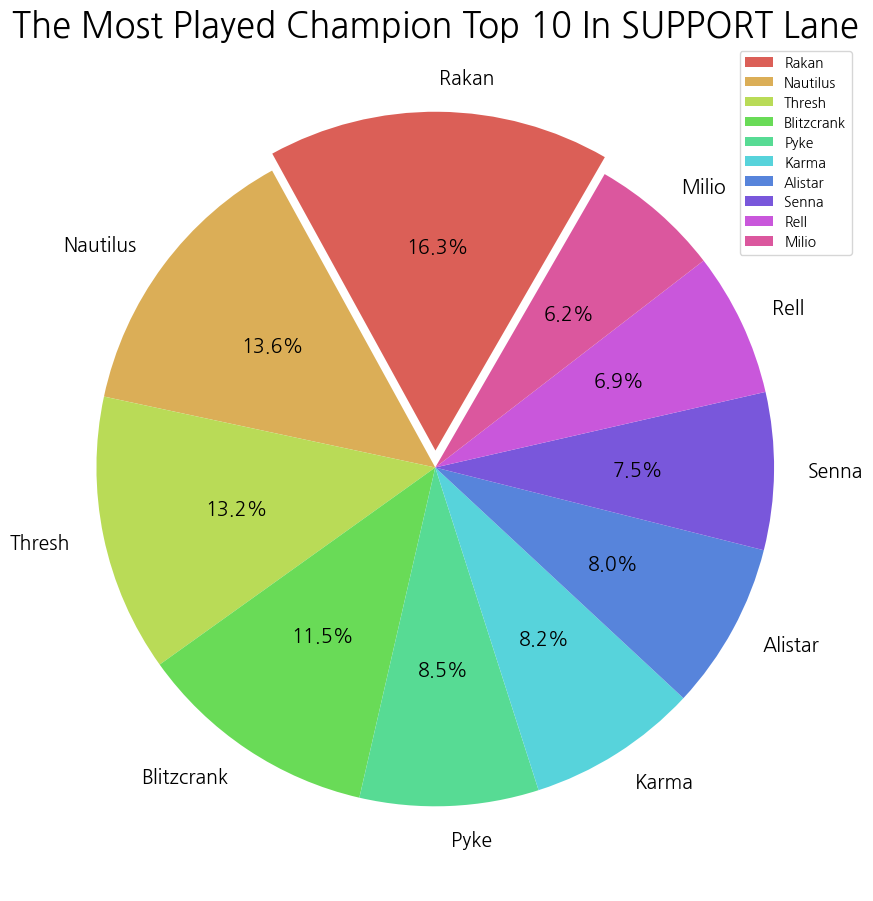

In [71]:
plt.figure(figsize=(11, 11))
colors = sns.color_palette('hls', len(high_kda_champion_support_df['kda']))
plt.pie(data=high_kda_champion_support_df, x='count', labels=high_kda_champion_support_df.index,
        autopct='%1.1f%%', startangle=60, explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors, textprops={'fontsize' : 14})
plt.legend(high_kda_champion_support_df.index)
plt.title("The Most Played Champion Top 10 In SUPPORT Lane", fontdict={'fontsize': 25})
plt.show()